# Data Preparation

Let's begin performing data preparation to whole project that consist in:
    - collecting
    - cleaning 
    - transforming
    - manipulating
 The raw data in regards to make a great analysis.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib as plt

In [2]:
# Due the different version of python can be found and each machine or libriries 
# I just decided to use this library to avoid distraction and anoing warnigs
import warnings
warnings.filterwarnings("ignore")

## Licence of use

Working with Dublin airpot dataset:
That dataset was collected from data.gov.ie - <https://data.gov.ie/dataset/tam07-passengers-freight-and-commercial-flights>
licence by Creative Commons Attribution 4.0 (CC BY 4.0) <https://creativecommons.org/licenses/by/4.0/>

Working with Hong Kong airport dataset:
That dataset was collected from data.gov.hk - <https://www.immd.gov.hk/opendata/eng/transport/immigration_clearance/statistics_on_daily_passenger_traffic.csv>
Open data licence by DATA.GOV.HK  <https://data.gov.hk/en/terms-and-conditions>

In [3]:
df_irl = pd.read_csv("TAM07.csv")
df_irl

,Statistic Label,Month,Airports in Ireland,Country,Direction,Flight Type,UNIT,VALUE
0,Passengers,2023 January,Dublin,All Countries,Arrival,Scheduled,Thousand,1056.4
1,Passengers,2023 January,Dublin,All Countries,Departure,Scheduled,Thousand,1014.5
2,Passengers,2023 January,Dublin,Ireland (domestic),Arrival,Scheduled,Thousand,5.7
3,Passengers,2023 January,Dublin,Ireland (domestic),Departure,Scheduled,Thousand,3.7
4,Passengers,2023 January,Dublin,Austria,Arrival,Scheduled,Thousand,8.7
...,...,...,...,...,...,...,...,...
1057,Passengers,2023 September,Dublin,United Arab Emirates,Departure,Scheduled,Thousand,26.3
1058,Passengers,2023 September,Dublin,Other Asian countries (4),Arrival,Scheduled,Thousand,16.4
1059,Passengers,2023 September,Dublin,Other Asian countries (4),Departure,Scheduled,Thousand,14.8
1060,Passengers,2023 September,Dublin,Oceania and Polar regions (1),Arrival,Scheduled,Thousand,0.0


In [4]:
df_hkg = pd.read_csv("statistics_on_daily_passenger_traffic.csv")
df_hkg

,Date,Control Point,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total,Unnamed: 7
0,01-01-2021,Airport,Arrival,341,0,9,350,NaN
1,01-01-2021,Airport,Departure,803,17,28,848,NaN
2,01-01-2021,Express Rail Link West Kowloon,Arrival,0,0,0,0,NaN
3,01-01-2021,Express Rail Link West Kowloon,Departure,0,0,0,0,NaN
4,01-01-2021,Hung Hom,Arrival,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
33501,26-12-2023,Harbour Control,Departure,0,0,17,17,NaN
33502,26-12-2023,Kai Tak Cruise Terminal,Arrival,0,0,0,0,NaN
33503,26-12-2023,Kai Tak Cruise Terminal,Departure,0,0,0,0,NaN
33504,26-12-2023,Macau Ferry Terminal,Arrival,12269,834,2995,16098,NaN


## Making sure that my data set is ready to be explored - EDA (Exploratory Data Analysis) - Understanding the data and patterns

    - df.info( ) # just with this command will be possible see shape(df.shape),types(df.dtypes)
        and just above, when the DF's were created, it's noticed the shape of each DF.
    

In [ ]:
df_irl.info()

In [ ]:
df_hkg.info()

## Data Cleaning
 

In [5]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df_irl[df_irl.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


In [6]:
duplicate_rows_df1 = df_hkg[df_hkg.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (0, 8)


In [7]:
# spliting the feature month in two new columns
df_irl['Month'] = pd.to_datetime(df_irl['Month'], format='%Y %B')

# Extract year and month into separate columns
df_irl['year'] = df_irl['Month'].dt.year
df_irl['month'] = df_irl['Month'].dt.month

In [8]:
#Converting the numbers to be work with real numbers and get a better visualisation
df_irl ["real_number"] = (df_irl["VALUE"] * 1000).astype(int)

In [9]:
#Cleaning dataset
to_drop = ["Airports in Ireland","Statistic Label", "UNIT", "Flight Type","Month"]
df_irl.drop(to_drop, inplace=True, axis=1)

In [10]:
df_irl

,Country,Direction,VALUE,year,month,real_number
0,All Countries,Arrival,1056.4,2023,1,1056400
1,All Countries,Departure,1014.5,2023,1,1014500
2,Ireland (domestic),Arrival,5.7,2023,1,5700
3,Ireland (domestic),Departure,3.7,2023,1,3700
4,Austria,Arrival,8.7,2023,1,8700
...,...,...,...,...,...,...
1057,United Arab Emirates,Departure,26.3,2023,9,26300
1058,Other Asian countries (4),Arrival,16.4,2023,9,16400
1059,Other Asian countries (4),Departure,14.8,2023,9,14800
1060,Oceania and Polar regions (1),Arrival,0.0,2023,9,0


In [11]:
df_hkg['Date'] = pd.to_datetime(df_hkg['Date'], format='%d-%m-%Y', errors='coerce')

# Create new columns for day, month, and year as integers
df_hkg['day'] = df_hkg['Date'].dt.day.astype(int)
df_hkg['month'] = df_hkg['Date'].dt.month.astype(int)
df_hkg['year'] = df_hkg['Date'].dt.year.astype(int)

In [12]:
# Filter rows where "Control Point" contains "Airport" and creating a new df 
df_hkg = df_hkg[df_hkg["Control Point"].str.contains("Airport")].reset_index(drop=True)

In [ ]:
df_hkg = df_hkg[(df_hkg['Date'] >= '2023-01-01') & (df_hkg['Date'] <= '2023-09-30')]

In [13]:
#Cleaning dataset
to_drop = ["Unnamed: 7", "Date", "Control Point"]
df_hkg.drop(to_drop, inplace=True, axis=1)

In [28]:
df_hkg

,Arrival / Departure,Hong Kong Residents,Mainland Visitors,Other Visitors,Total,day,month,year
0,Arrival,341,0,9,350,1,1,2021
1,Departure,803,17,28,848,1,1,2021
2,Arrival,363,10,10,383,2,1,2021
3,Departure,940,22,33,995,2,1,2021
4,Arrival,880,4,36,920,3,1,2021
...,...,...,...,...,...,...,...,...
2175,Departure,44507,6719,14920,66146,24,12,2023
2176,Arrival,30783,6998,20491,58272,25,12,2023
2177,Departure,33244,6654,17880,57778,25,12,2023
2178,Arrival,47795,5423,18787,72005,26,12,2023


# Data preparation to Sentimental analysis DFs - Dublin and Hong Kong airport

In order to collect reviews about Dublin and Hong kong airports, Praw library it' going to be use to collect comments from Reddit.

Note: Praw library is an officially supported way to interact with the Reddit API, and Reddit's Terms of Service does allow the use for non-commercial purposes. 

In [14]:
import praw
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [ ]:
load_dotenv()

def revw_reddit(subreddit,ask_query): # This function will collect reviews from reddit with 2 parameters to bring back a DF
    reddit = praw.Reddit(
        client_id=getenv("APP_ID"),
        client_secret=getenv("AP_SECRET"),
        user_agent=f"{getenv('APP_NAME')} (by u/{getenv('REDDIT_USERNAME')})",
        username=getenv("REDDIT_USERNAME"),
        password=getenv("REDDIT_PASSWORD")
    )
    subreddit = reddit.subreddit(subreddit)
    results = subreddit.search(ask_query, limit=400)  

# Creating Lists to store titles and texts to convert those in DF acordind my seach like Dublin, airport
    titles = []
    texts = []
    
# Collecting titles and texts which is the base to sentimental analisys
    for submission in results:
        titles.append(submission.title)
        texts.append(submission.selftext)

# Return a DataFrame with title and comments
    return pd.DataFrame({'title': titles, 'text': texts})

In [ ]:
load_dotenv() #TEST of reading my .env document

## Collecting reviews from Reddit - Dublin airport

In [ ]:
df_dublin_reviews = revw_reddit("Dublin","airport")

In [ ]:
df_dublin_reviews

## Collecting reviews from Reddit - Hong Kong airport

In [ ]:
df_hkg_reviews = revw_reddit("HongKong","airport")

In [ ]:
df_hkg_reviews

### Preparing the datasets

In [ ]:
#DUBLIN

# Merging title and text in order to have mora words to analyse
df_dublin_reviews['text'] = df_dublin_reviews['title'] + ' ' + df_dublin_reviews['text']
df_dublin_reviews = df_dublin_reviews.drop(columns=['title'])

# removing any special characters, double spaces, tabs etc.
df_dublin_reviews['text'] = df_dublin_reviews['text'].str.replace('[^\w\s\.]','')

# Dropping na and duplicates
df_dublin_reviews = df_dublin_reviews.dropna()
df_dublin_reviews = df_dublin_reviews.drop_duplicates()

#exporting the data set as csv - to share indeed
df_dublin_reviews.to_csv('df_dublin_reviews.csv', index = False)


In [ ]:
#HONG KONG

# Merging title and text in order to have mora words to analyse
df_hkg_reviews['text'] = df_hkg_reviews['title'] + ' ' + df_hkg_reviews['text']
df_hkg_reviews = df_hkg_reviews.drop(columns=['title'])

# removing any special characters, double spaces, tabs etc.
df_hkg_reviews['text'] = df_hkg_reviews['text'].str.replace('[^\w\s\.]','')

# Dropping na and duplicates
df_hkg_reviews = df_hkg_reviews.dropna()
df_hkg_reviews = df_hkg_reviews.drop_duplicates()

#exporting the data set as csv - to share indeed
df_hkg_reviews.to_csv('df_hkg_reviews.csv', index = False)


In [16]:
 df_irl

,Country,Direction,VALUE,year,month,real_number
0,All Countries,Arrival,1056.4,2023,1,1056400
1,All Countries,Departure,1014.5,2023,1,1014500
2,Ireland (domestic),Arrival,5.7,2023,1,5700
3,Ireland (domestic),Departure,3.7,2023,1,3700
4,Austria,Arrival,8.7,2023,1,8700
...,...,...,...,...,...,...
1057,United Arab Emirates,Departure,26.3,2023,9,26300
1058,Other Asian countries (4),Arrival,16.4,2023,9,16400
1059,Other Asian countries (4),Departure,14.8,2023,9,14800
1060,Oceania and Polar regions (1),Arrival,0.0,2023,9,0


In [ ]:
df_hkg

In [ ]:
# Just in case if needs an update
#!pip install dash --upgrade
#!pip install plotly --upgrade

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objects as go

# Assuming your dataset is df_irl
df_irl = pd.read_csv('df_irl.csv')  # Replace with the actual filename or path

# Create a Dash app
app = dash.Dash(__name__)

# Initial month for default display
initial_month = df_irl['month'].unique()[0]

# Create an interactive choropleth map with Plotly Graph Objects
fig = go.Figure()

# Add initial frame
fig.add_trace(
    go.Choropleth(
        locations=df_irl['Country'],
        z=df_irl[df_irl['month'] == initial_month]['real_number'],
        hoverinfo='location+z',
        locationmode='country names',
        colorscale='RdBu',  # Change the color scale here
        colorbar=dict(title='Number of Arrivals (log scale)'),
    )
)

# Add colorbar for reference
fig.update_layout(coloraxis_colorbar=dict(title="Number of Arrivals (log scale)"))

# Update layout for larger graph
fig.update_layout(
    height=800,  # Change the height as per your preference
)

# Define layout for the app
app.layout = html.Div([
    dcc.Graph(id='air-traffic-map', figure=fig),
])

# Define callback to update choropleth map based on selected month
@app.callback(
    Output('air-traffic-map', 'figure'),
    [Input('air-traffic-map', 'relayoutData')]
)
def update_choropleth_map(relayout_data):
    frames = []

    for frame_month in df_irl['month'].unique():
        frame_data = go.Choropleth(
            locations=df_irl['Country'],
            z=df_irl[df_irl['month'] == frame_month]['real_number'],
            hoverinfo='location+z',
            locationmode='country names',
            colorscale='RdBu',  # Change the color scale here
            colorbar=dict(title='Number of Arrivals (log scale)'),
        )
        frame = go.Frame(data=[frame_data], name=str(frame_month))
        frames.append(frame)

    # Update layout properties
    fig.update_layout(
        updatemenus=[{
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}],
                    'label': 'Play',
                    'method': 'animate',
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate',
                },
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top',
        }],
        sliders=[{
            'active': 0,
            'yanchor': 'top',
            'xanchor': 'left',
            'currentvalue': {
                'font': {'size': 16},
                'prefix': 'Month:',
                'visible': True,
                'xanchor': 'right',
            },
            'transition': {'duration': 300, 'easing': 'cubic-in-out'},
            'steps': [{'args': [[str(frame)], {'frame': {'duration': 300, 'redraw': True}, 'mode': 'immediate', 'transition': {'duration': 300}}],
                       'label': str(frame),
                       'method': 'animate'} for frame in df_irl['month'].unique()],
        }],
    )

    fig.frames = frames

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


# Statistics

In [21]:
#  Making a df with the real number column it's the statistical data
column_to_keep = "real_number"
df_irl_stsc = df_irl[[column_to_keep]]

In [22]:
df_irl_stsc

,real_number
0,1056400
1,1014500
2,5700
3,3700
4,8700
...,...
1057,26300
1058,16400
1059,14800
1060,0


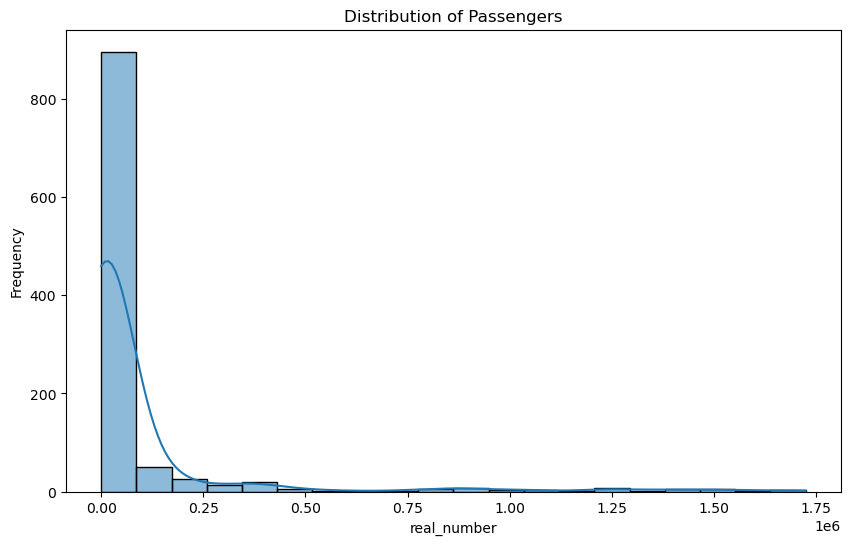

Descriptive Statistics:
        real_number
count  1.062000e+03
mean   9.066601e+04
std    2.592409e+05
min    0.000000e+00
25%    2.825000e+03
50%    8.050000e+03
75%    4.122500e+04
max    1.723900e+06

Measures of Central Tendency:
Mean:
real_number    90666.006591
dtype: float64

Mode:
real_number    0
Name: 0, dtype: int64

Median:
real_number    8050.0
dtype: float64


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display basic descriptive statistics
summary_stats = df_irl_stsc.describe()

# Cauculating ad Display measures of central tendency: mean, mode, median
mean_values = df_irl_stsc.mean()
mode_values = df_irl_stsc.mode().iloc[0]
median_values = df_irl_stsc.median()

# Visualize the distribution of a numerical column 
# This section creates a histogram using Seaborn to visualize the distribution of the 'real_number' column. 
# It sets the figure size, specifies the number of bins, adds a kernel density estimate (KDE).
plt.figure(figsize=(10, 6))
sns.histplot(df_irl_stsc['real_number'], bins=20, kde=True)
plt.title('Distribution of Passengers')
plt.xlabel('real_number')
plt.ylabel('Frequency')
plt.show()

# Display the summary statistics and measures of central tendency
# this part prints the descriptive statistics and measures of central tendency calculated earlier.
# It provides an overview of the data distribution and its central tendencies.
print("Descriptive Statistics:")
print(summary_stats)

print("\nMeasures of Central Tendency:")
print("Mean:")
print(mean_values)

print("\nMode:")
print(mode_values)

print("\nMedian:")
print(median_values)

In [26]:
# install just in case
# !pip install statsmodels 

In [38]:
import statsmodels.api as sm

# Filter the dataset for 'Arrival' direction
arrival_data = df_irl[df_irl['Direction'] == 'Arrival']

# Extract the total arrivals for 'All Countries' in July
total_arrivals_july = arrival_data[(arrival_data['month'] == 7) & (arrival_data['Country'] == 'All Countries')]['real_number'].sum()

# Display the count of arrivals in July
count_july_arrivals = total_arrivals_july
print(f"Number of Arrivals to Dublin in July: {count_july_arrivals}")

# Calculate the proportion of users commuting to Dublin in July
total_arrivals = arrival_data.shape[0]

# Check if total_arrivals is not zero before proceeding
if total_arrivals != 0:
    proportion_july_arrivals = count_july_arrivals / total_arrivals
    print(f"Proportion of Arrivals to Dublin in July: {proportion_july_arrivals:.4f}")

    # Calculate a 95% confidence interval for the population proportion
    conf_interval = sm.stats.proportion_confint(count_july_arrivals, total_arrivals, alpha=0.05)
    print(f"\n95% Confidence Interval for the Population Proportion: {conf_interval}")

    # Perform a hypothesis test to check if the proportion is significantly different from 0.5 (as an example)
    # Null hypothesis: The population proportion of arrivals in July is equal to 0.5
    # Alternative hypothesis: The population proportion of arrivals in July is not equal to 0.5

    # Perform a z-test for proportions
    z_stat, p_value = sm.stats.proportions_ztest(count_july_arrivals, total_arrivals, value=0.5)

    # Display the results of the hypothesis test
    print("\nHypothesis Test Results:")
    print(f"Z-statistic: {z_stat}")
    print(f"P-value: {p_value}")

    # Check if the null hypothesis is rejected (using a significance level of 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis. There is enough evidence to suggest that the population proportion is not equal to 0.5.")
    else:
        print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the population proportion is different from 0.5.")
else:
    print("\nTotal arrivals are zero. Unable to perform hypothesis test.")


Number of Arrivals to Dublin in July: 1695600
Proportion of Arrivals to Dublin in July: 3193.2203

95% Confidence Interval for the Population Proportion: (nan, nan)

Hypothesis Test Results:
Z-statistic: nan
P-value: nan

Fail to reject the null hypothesis. There is not enough evidence to suggest that the population proportion is different from 0.5.


In [39]:
import statsmodels.api as sm

# Filter the dataset for 'Arrival' direction and 'All Countries' in July
july_arrival_data = df_irl[(df_irl['month'] == 7) & (df_irl['Direction'] == 'Arrival') & (df_irl['Country'] == 'All Countries')]

# Display the count of arrivals in July
count_july_arrivals = july_arrival_data['real_number'].sum()
print(f"Number of Arrivals to Dublin in July: {count_july_arrivals}")

# Calculate the proportion of users commuting to Dublin in July
total_arrivals = df_irl[(df_irl['Direction'] == 'Arrival') & (df_irl['Country'] == 'All Countries')]['real_number'].sum()

# Check if total_arrivals is not zero before proceeding
if total_arrivals != 0:
    proportion_july_arrivals = count_july_arrivals / total_arrivals
    print(f"Proportion of Arrivals to Dublin in July: {proportion_july_arrivals:.4f}")

    # Calculate a 95% confidence interval for the population proportion
    conf_interval = sm.stats.proportion_confint(count_july_arrivals, total_arrivals, alpha=0.05)
    print(f"\n95% Confidence Interval for the Population Proportion: {conf_interval}")

    # Perform a hypothesis test to check if the proportion is significantly different from 0.5 (as an example)
    # Null hypothesis: The population proportion of arrivals in July is equal to 0.5
    # Alternative hypothesis: The population proportion of arrivals in July is not equal to 0.5

    # Perform a z-test for proportions
    z_stat, p_value = sm.stats.proportions_ztest(count_july_arrivals, total_arrivals, value=0.5)

    # Display the results of the hypothesis test
    print("\nHypothesis Test Results:")
    print(f"Z-statistic: {z_stat}")
    print(f"P-value: {p_value}")

    # Check if the null hypothesis is rejected (using a significance level of 0.05)
    alpha = 0.05
    if p_value < alpha:
        print("\nReject the null hypothesis. There is enough evidence to suggest that the population proportion is not equal to 0.5.")
    else:
        print("\nFail to reject the null hypothesis. There is not enough evidence to suggest that the population proportion is different from 0.5.")
else:
    print("\nTotal arrivals are zero. Unable to perform hypothesis test.")


Number of Arrivals to Dublin in July: 1695600
Proportion of Arrivals to Dublin in July: 0.1337

95% Confidence Interval for the Population Proportion: (0.13347295076107318, 0.13384746008876797)

Hypothesis Test Results:
Z-statistic: -3834.4188001430616
P-value: 0.0

Reject the null hypothesis. There is enough evidence to suggest that the population proportion is not equal to 0.5.


## Insight
    - Even though the number of arrivals ... ops has to fix the sum and the correct numbers

In [31]:
proportion_july_arrivals_irl= 0.1111
proportion_july_arrivals_hkg= 0.0853

# Display the proportions
print(f"Proportion of Arrivals to Dublin in July: {proportion_july_arrivals_irl:.4f}")
print(f"Proportion of Arrivals to Hong Kong in July: {proportion_july_arrivals_hkg:.4f}")

# Compare the proportions
if proportion_july_arrivals_irl > proportion_july_arrivals_hkg:
    print("\nJuly was more popular in Dublin.")
elif proportion_july_arrivals_irl < proportion_july_arrivals_hkg:
    print("\nJuly was more popular in Hong Kong.")
else:
    print("\nJuly had similar popularity in both Dublin and Hong Kong.")


Proportion of Arrivals to Dublin in July: 0.1111
Proportion of Arrivals to Hong Kong in July: 0.0853

July was more popular in Dublin.


In [34]:
# Filter the dataset for July and 'Arrival' direction
july_arrival_data = df_irl[(df_irl['month'] == 7) & (df_irl['Direction'] == 'Arrival')]

# Extract the total arrivals for 'All Countries' in July
total_arrivals_july = july_arrival_data[july_arrival_data['Country'] == 'All Countries']['real_number'].sum()

# Print the total arrivals in July
print(f'Total Arrivals in July: {total_arrivals_july}')

Total Arrivals in July: 1695600
